In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import regex as re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [2]:
file = '../input/heart.csv'
df = pd.read_csv(file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


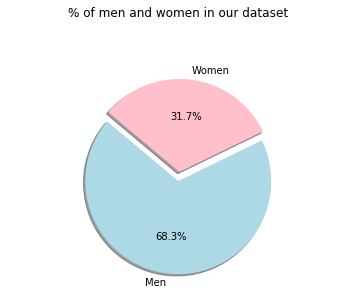

In [4]:
label = 'Men','Women'
sizes = [0.6831, 0.3168]
colors = ['lightblue','pink']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=label, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of men and women in our dataset\n\n\n')
plt.axis('equal')
plt.show()

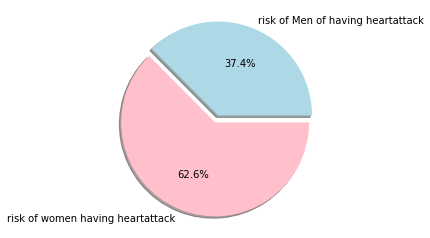

In [5]:
label = 'risk of Men of having heartattack','risk of women having heartattack'
sizes = [(0.449), (0.75)]
colors = ['lightblue','pink']
explode = (0.08, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=label, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
 
plt.axis('equal')
plt.show()

In [1]:
slices_hours = [207-93, 93]
activities = ['% Men not at risk', '% Men at risk']
colors = ['lightgreen', 'orange','b','y']
plt.pie(slices_hours, labels=activities, colors=colors,shadow = True, startangle=90, autopct='%.1f%%')
plt.title('Analysis of positive heart attack in men out of total men')
plt.show()

#percentage of men at risk

NameError: name 'plt' is not defined

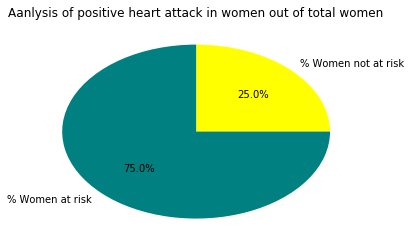

In [7]:
slices_hours = [96-72, 72]
activities = ['% Women not at risk', '% Women at risk']
colors = ['yellow','teal']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=0, autopct='%.1f%%')
plt.title('Aanlysis of positive heart attack in women out of total women')
plt.show()

#percentage of women at risk

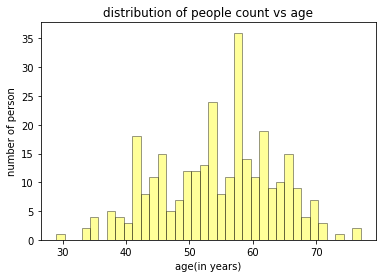

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


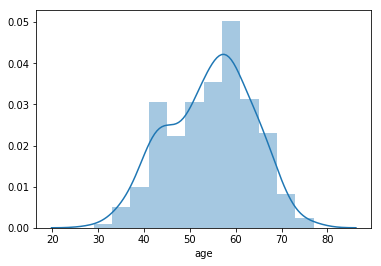

In [8]:
# age distribution of people affected

import seaborn as sns

# seaborn histogram
sns.distplot(df['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'yellow',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('distribution of people count vs age')
plt.xlabel('age(in years)')
plt.ylabel('number of person')
plt.show()
sns.distplot(df['age'])

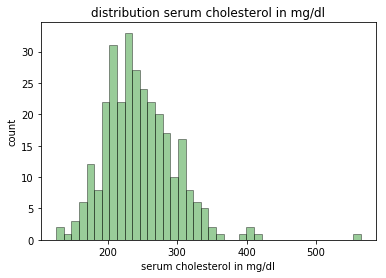

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


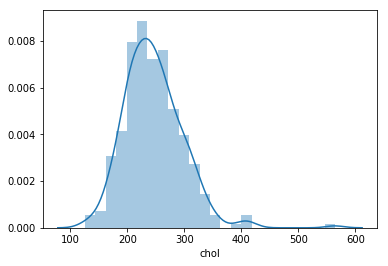

In [9]:
# distribution of cholesterol level in affected people

sns.distplot(df['chol'], hist=True, kde=False, 
             bins=int(200/5), color = 'green',
             hist_kws={'edgecolor':'black'})

plt.title('distribution serum cholesterol in mg/dl')
plt.xlabel('serum cholesterol in mg/dl')
plt.ylabel('count')
plt.show()
sns.distplot(df['chol'])

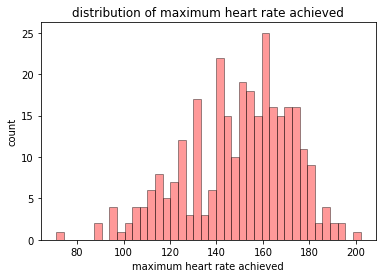

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


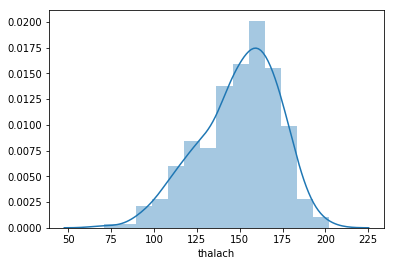

In [10]:
# max heart rate distribution 

sns.distplot(df['thalach'], hist=True, kde=False, 
             bins=int(200/5), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.title('distribution of maximum heart rate achieved')
plt.xlabel('maximum heart rate achieved')
plt.ylabel('count')
plt.show()
sns.distplot(df['thalach'])

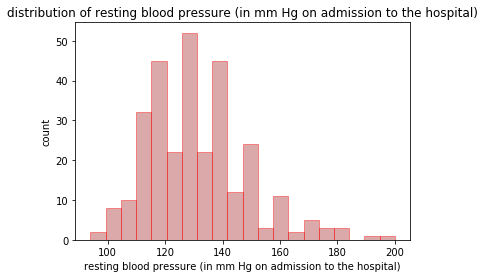

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


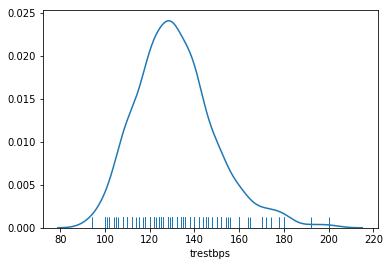

In [11]:
# resting heart rate distribution

sns.distplot(df['trestbps'], hist=True, kde=False, 
             bins=int(100/5), color = 'brown',
             hist_kws={'edgecolor':'red'})

plt.title('distribution of resting blood pressure (in mm Hg on admission to the hospital)')
plt.xlabel('resting blood pressure (in mm Hg on admission to the hospital)')
plt.ylabel('count')
plt.show()
sns.distplot(df['trestbps'],rug = True,hist = False)
